<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/Analisando_Aluguel_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 1. Importando Bibliotecas

In [2]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Leitura dos dados na memória utilizando a biblioteca Pandas

In [3]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Softex/Semana1/datasets/bike-rental/day.csv')
dados.dteday = pd.to_datetime(dados.dteday,format='%Y-%m-%d')

In [4]:
dados.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 3. Limpeza e organização dos dados

In [5]:
#excluindo colunas não utilizadas
dados = dados.drop(columns=['instant','casual','registered'])
dados.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## 4. Análise preliminar dos dados

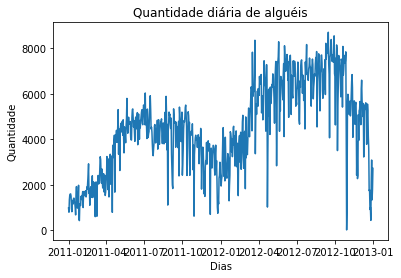

In [6]:
#plotando série temporal diária de alugueis
plt.plot(dados.dteday,dados.cnt)
plt.xlabel('Dias')
plt.ylabel('Quantidade')
plt.title('Quantidade diária de alguéis')
plt.show()

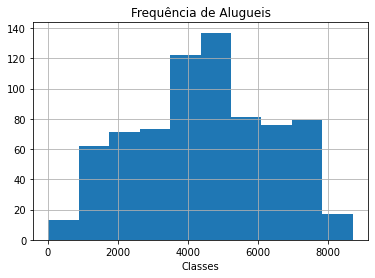

In [23]:
#plotando histograma de frequências dos alugueis
plt.hist(dados['cnt'],10)
plt.ylabel('Quantidade')
plt.title('Frequência de Alugueis')
plt.grid(True)
plt.show()

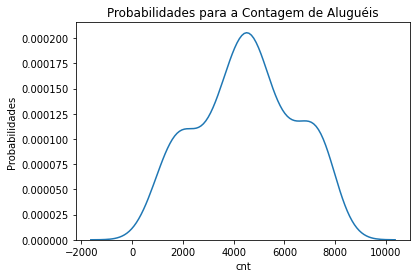

In [24]:
#distribuição de probabilidade para a contagem de aluguéis
sns.distplot(dados.cnt, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Probabilidades para a Contagem de Aluguéis')
plt.show()

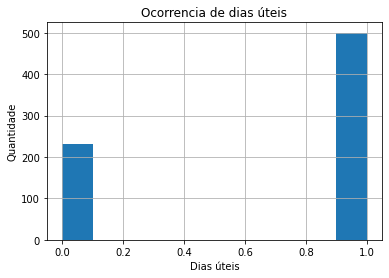

In [25]:
#plotando ocorrência de dias uteis
plt.hist(dados.workingday)
plt.xlabel('Dias úteis')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de dias úteis')
plt.grid(True)
plt.show()

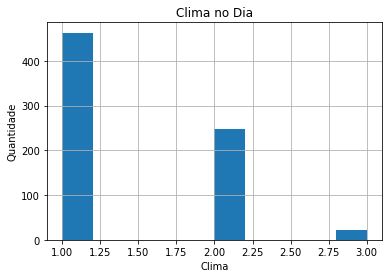

In [26]:
#plotando ocorrência do clima no dia
plt.hist(dados.weathersit)
plt.xlabel('Clima')
plt.ylabel('Quantidade')
plt.title('Clima no Dia')
plt.grid(True)
plt.show()

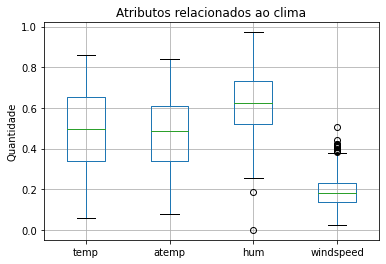

In [11]:
#box plot das colunas relacionadas ao clima
dados[['temp','atemp','hum','windspeed']].boxplot()
plt.ylabel('Quantidade')
plt.title('Atributos relacionados ao clima')
plt.show()


In [12]:
#correlação entre todos os atributos
corr = dados.corr()
corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659


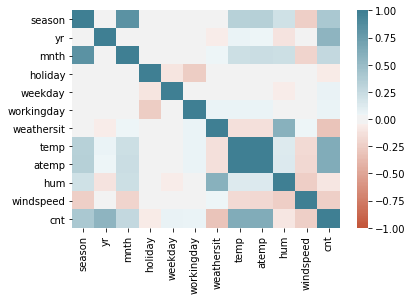

In [13]:
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

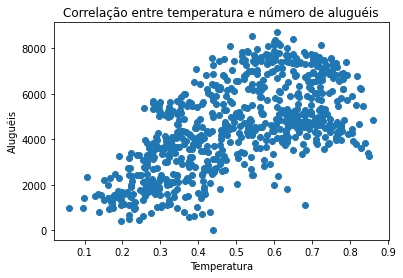

In [18]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.temp,dados.cnt)
plt.xlabel('Temperatura')
plt.ylabel('Aluguéis')
plt.title('Correlação entre temperatura e número de aluguéis')
plt.show()

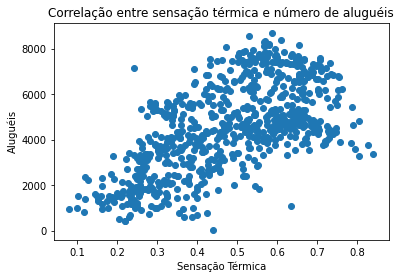

In [19]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.atemp,dados.cnt)
plt.xlabel('Sensação Térmica')
plt.ylabel('Aluguéis')
plt.title('Correlação entre sensação térmica e número de aluguéis')
plt.show()

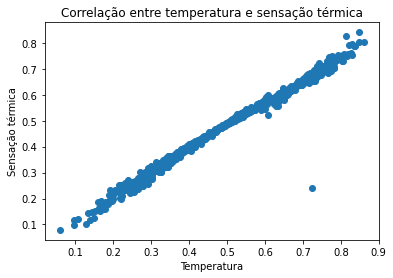

In [20]:
# plotando correlação entre temperatura e sensação térmica
plt.scatter(dados.temp,dados.atemp)
plt.xlabel('Temperatura')
plt.ylabel('Sensação térmica')
plt.title('Correlação entre temperatura e sensação térmica')
plt.show()

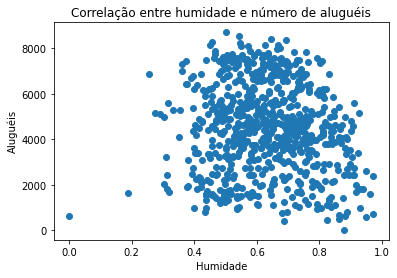

In [21]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.hum,dados.cnt)
plt.xlabel('Humidade')
plt.ylabel('Aluguéis')
plt.title('Correlação entre humidade e número de aluguéis')
plt.show()

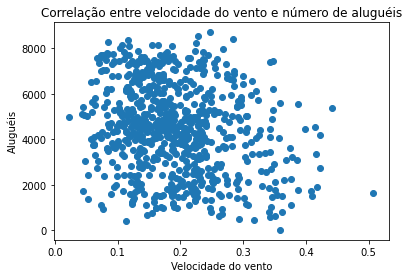

In [22]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.windspeed,dados.cnt)
plt.xlabel('Velocidade do vento')
plt.ylabel('Aluguéis')
plt.title('Correlação entre velocidade do vento e número de aluguéis')
plt.show()

## 5. Normalização dos dados

In [37]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (20,3)

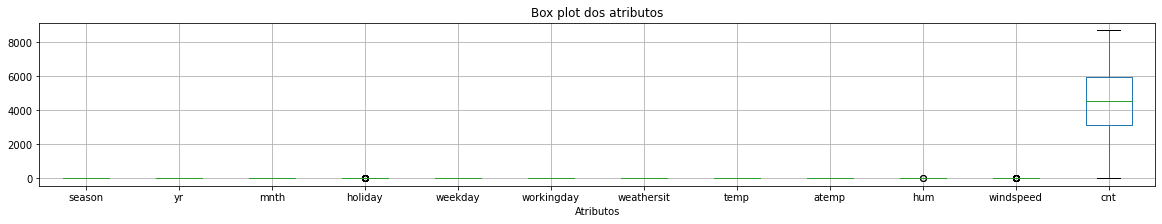

In [38]:
#plotando boxplot dos dados
dados.boxplot()
plt.title('Box plot dos atributos')
plt.xlabel('Atributos')
plt.show()

In [30]:
#funcao de reescala pelo maximo
def reescalaMax(dados):
    return dados/dados.max()

In [32]:
norm1 = reescalaMax(dados.drop(columns = ['dteday']))

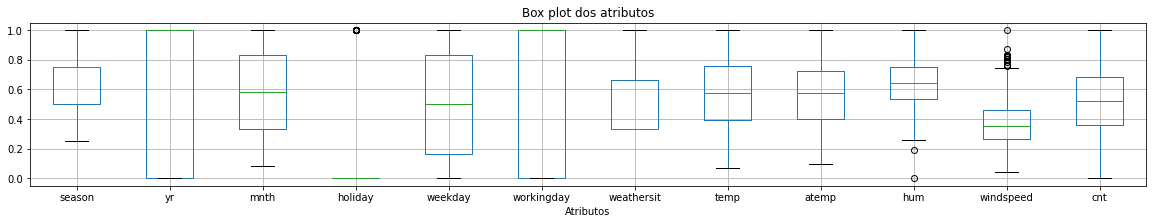

In [36]:
#plotando boxplot dos dados
norm1.boxplot()
plt.title('Box plot dos atributos')
plt.xlabel('Atributos')
plt.show()

In [43]:
#funcao de reescala usando maximo e minimo
def reescalaMaxMin(dados):
    return (dados - dados.min())/(dados.max()-dados.min())

In [40]:
norm2 = reescalaMaxMin(dados.drop(columns = ['dteday']))

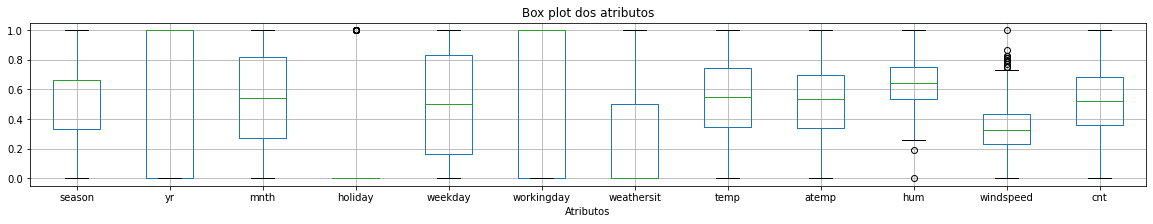

In [42]:
#plotando boxplot dos dados
norm2.boxplot()
plt.title('Box plot dos atributos')
plt.xlabel('Atributos')
plt.show()

In [44]:
#funcao de reescala usando normal
def reescalaNormal(dados):
    return (dados - dados.mean())/dados.std()

In [45]:
norm3 = reescalaNormal(dados.drop(columns = ['dteday']))

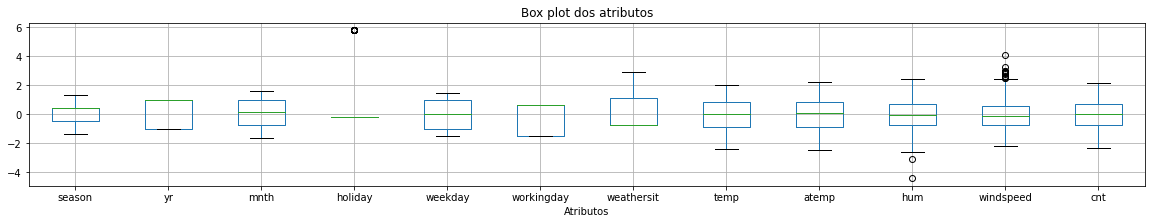

In [46]:
#plotando boxplot dos dados
norm3.boxplot()
plt.title('Box plot dos atributos')
plt.xlabel('Atributos')
plt.show()